In [2]:
# Question 1 
import csv
import numpy as np
from scipy import stats
import math
from numpy.linalg import inv, norm, pinv
import random
# I found it difficult ot de compress it in jupyter so I used Linux convert them into csv files
Tr = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\KNN\\data\\mnist_train.csv", "rb"), delimiter=",")
Tx = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\KNN\\data\\mnist_test.csv", "rb"), delimiter=",")
print("Size of the training set:-")
print(Tr.shape)
print("Size of the Testing set:-")
print(Tx.shape)
print("Size of the Testing Labes:-")



Size of the training set:-
(60000, 785)
Size of the Testing set:-
(10000, 785)
Size of the Testing Labes:-


In [20]:
# the first columns are the labels and rest are pixels for the 
TrD = Tr[:,1:]              # Training data
TrL = Tr[:,0]               # Training Labels
TxD = Tx[:,1:]              # Testing data
TxL = Tx[:,0]               # Testing Labels

print("Size of the training set:-")
print(TrD.shape)    
print("Size of the training Labels:-")
print(TrL.shape)
print("Size of the Testing set:-")
print(TxD.shape)
print("Size of the Testing Labes:-")
print(TxL.shape)


Size of the training set:-
(60000, 784)
Size of the training Labels:-
(60000,)
Size of the Testing set:-
(10000, 784)
Size of the Testing Labes:-
(10000,)


7.0


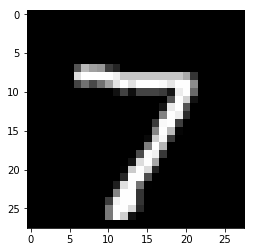

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
d=np.array(TxD[0])
d.shape=(28,28)
plt.imshow(d,cmap='gray')
print(TxL[0])

In [60]:
imax = TxD.shape[0]                 # max number of rows in the test image that we want to test
pred= np.zeros((imax, 1))           # intialize an array to store the predictions
for jj in range(0,imax):            
    tstimage=TxD[jj,:]   # temp image  
    Distance_matrix = np.einsum('ij, ij->i', (TrD-tstimage), (TrD-tstimage))  #distance calculater
    Sorted_array = np.argsort(Distance_matrix, axis = None)         #sorting to find the minimum distance
    pred[jj]=TrL[Sorted_array[0]]                                   #least distance
print("Predections of the classifier")
print(pred)                                   
print("Test Labels")
print(TxL)
crtpred= np.zeros((imax, 1))  # intialize correct predictions array  
for cnter in range(1,imax): 
    crtpred[cnter]=pred[cnter]==TxL[cnter]     # if prediction was correct crtprd= 1
cpsum = np.sum(crtpred) #correct predection sum 
p = cpsum*100/imax      # Accuracy    
error1nn= 100-p

print("Accuracy using K=1 Nearest Neighbor ")
print(p)
print("error using K-1 NN")
print(error1nn)

Predections of the classifier
[[ 7.]
 [ 2.]
 [ 1.]
 ..., 
 [ 4.]
 [ 5.]
 [ 6.]]
Test Labels
[ 7.  2.  1. ...,  4.  5.  6.]
Accuracy using K=1 Nearest Neighbor 
96.9
error using K-1 NN
3.1


In [65]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(TxL,pred)
print('The confusion matrix for 1NN classifier is:')
print(cmat)
# the condusion matrix shows the Label and predicted output, meaning if 0 was the label and zero was predicted; 0 was
# the label and 1 was predicted etc.

The confusion matrix for 1NN classifier is:
[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [   0    7    0    0  944    0    3    5    1   22]
 [   1    1    0   12    2  860    5    1    6    4]
 [   4    2    0    0    3    5  944    0    0    0]
 [   0   14    6    2    4    0    0  992    0   10]
 [   6    1    3   14    5   13    3    4  920    5]
 [   2    5    1    6   10    5    1   11    1  967]]


In [68]:
print(d.shape)
print(d)

(28, 28)
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0

In [69]:
A[54,54]

NameError: name 'A' is not defined

In [72]:
d[54,54]

IndexError: index 54 is out of bounds for axis 0 with size 28

In [144]:
N=2
nmax = int(28/N)
a= np.zeros((nmax, nmax))
for i in range(0,nmax):
    for j in range(0,nmax):
        ii=i*N
        jj=j*N
        a[i,j]= sum(sum(d[ii:(ii+N),jj:(jj+N)]))
# plt.imshow(a,cmap='gray')
# print(a.shape)
b=a.flatten()
N=2
d1=np.array(TrD[2])
d1.shape=(28,28)
nmax = int(28/N)
a= np.zeros((nmax, nmax))
for i in range(0,nmax):
    for j in range(0,nmax):
        ii=i*N
        jj=j*N
        a[i,j]= sum(sum(d1[ii:(ii+N),jj:(jj+N)]))
# plt.imshow(a,cmap='gray')
# print(a.shape)
b2=a.flatten()
b.shape=(1,196)
b2.shape=(1,196)

# print(b)
# print(b2)
cc=np.vstack((b,b2))
cc=np.vstack((cc,b2))
print(b2.shape)
print(cc)
# c=np.array(b)
# print(c.shape)
# c.shape=(14,14)
# print(c.shape)
# plt.imshow(c,cmap='gray')
# print(TxL[0])



(1, 196)
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.  269.  310.   96.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  657.
   694.  885.  875.  904.  900.  879.  616.    0.    0.    0.    0.    0.
     0.    0.    0.   17.   80.  134.  126.  593.  587.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.  151.  980.  127.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  695.  508.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  135.
   889.   58.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    19.  801.  463.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.  498.  804.   35.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.  164.  98

In [130]:
print(b.shape)

(196,)
